In [3]:
import numpy as np
import pandas as pd

from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import time
from tqdm import tqdm

In [32]:
# 1. 테스트 브라우저 열어주기
driver = wb.Chrome()

url = "https://map.naver.com/p?c=15.00,0,0,0,dh" # 네이버 지도
driver.get(url)

In [33]:
# 2. 검색하기 -> 이수역 맛집

query = input("검색할 단어를 입력 >> ")

검색할 단어를 입력 >>  이수역 맛집


In [42]:
# 검색란 가져오기
search_input = driver.find_element(By.CSS_SELECTOR, ".input_search")

In [44]:
search_input.send_keys(query + "\n")

In [46]:
# 가게명 수집해보기
driver.find_elements(By.CSS_SELECTOR, "span.TYaxT")
# li:nth-child(3) : ul태그 안에 li태그는 여러 개가 존재함, 그 중 해당 li태그의 고유 번호를 의미!

[]

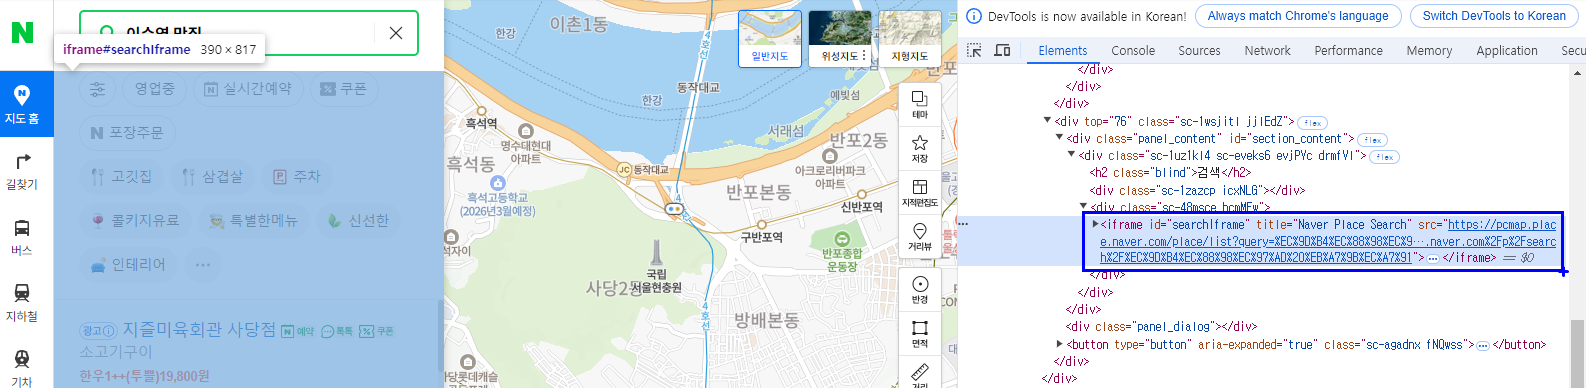

### imframe 태그
- 하나의 doc에서 다른 doc을 구성하고자 할 때 사용 -> 동영상, 뮤직비디오 등
---
- 여태껏 했던 크롤링 -> 일반적인 접근
- 일반적인 접근은 웹페이지 전체(doc)를 불러옴
- iframe 내에 있는 요소에 접근하려면, 일반적인 접근으로는 불가능!

In [73]:
# iframe 창 전환하는 함수
driver.switch_to.frame("searchIframe") # id값만 적어주기!

In [53]:
# 정상적으로 수집이 된다!
food_stores = driver.find_elements(By.CSS_SELECTOR, "span.TYaxT")

#### 가게명 말고도, 가게 주소와 전화번호 수집


In [59]:
food_stores[0].click()

In [65]:
# driver.find_element(By.CSS_SELECTOR, "div.O8qbU.tQY7D > div > a > span.LDgIH")
# 현재 iframe 내에는 해당 요소가 없음!
# 옮겨주어야 함!

In [67]:
# 이전 창으로 되돌아가는 함수
driver.switch_to.default_content()

In [69]:
driver.switch_to.frame("entryIframe") # 상세 페이지로 접근

In [83]:
# 주소도 잘 가져와진다!
store_name = driver.find_element(By.CSS_SELECTOR, "div.O8qbU.tQY7D > div > a > span.LDgIH").text
store_name

'서울 관악구 남현1길 58 1층 힘찬정육식당'

In [85]:
# 전화번호 가져오기
store_phone = driver.find_element(By.CSS_SELECTOR, "div.O8qbU.nbXkr > div > span.xlx7Q").text
store_phone

'02-521-6366'

In [87]:
driver.switch_to.default_content()

In [95]:
driver.switch_to.frame("searchIframe")

In [97]:
# 새롭게 접근하는 페이지마다 요소 로드하기!
food_stores = driver.find_elements(By.CSS_SELECTOR, "span.TYaxT")
food_stores[1].click()

In [99]:
driver.quit()

### 실습!! 가게 정보 수집하기!!
- 1page 내에서 가게명, 가게 주소, 전화번호 수집!

In [39]:
driver.quit()

- 너무 많은 요청으로 응답이 제대로 안이루어질 수도 있음
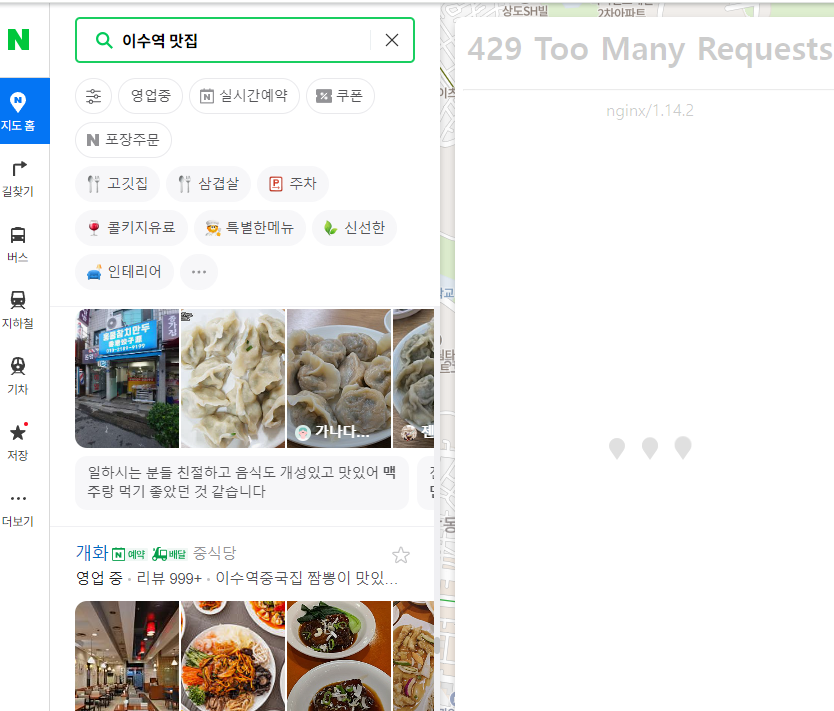

In [46]:
from selenium.webdriver.chrome.options import Options # 셀레니움 옵션 설정 도구

In [48]:
# 여러가지 옵션 설정 가능
options = Options()
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36')
# options.add_argument('headless') # 테스트 브라우저를 백그라운드 상에서 동작
options.add_argument("disable-blink-features=AutomationControlled")  # 자동화 탐지 방지
options.add_experimental_option("excludeSwitches", ["enable-automation"])  # 자동화 표시 제거
options.add_experimental_option('useAutomationExtension', False)  # 자동화 확장 기능 사용 안 함

# 1. 브라우저 열기
driver = wb.Chrome(options=options)
url = "https://map.naver.com/p?c=15.00,0,0,0,dh" # 네이버 지도
driver.get(url)
time.sleep(3)

# 2. 요청
query = input("검색할 단어를 입력 >> ")

# 3. 검색
search_input = driver.find_element(By.CSS_SELECTOR, ".input_search")
search_input.send_keys(query + "\n")
time.sleep(5)

store_names = []
store_adds = []
store_phones = []

driver.maximize_window() # 최대화

# 4. 창전환
driver.switch_to.frame("searchIframe")
time.sleep(1)

# 스크롤 하강
while True : 
    old = driver.page_source

    # 스크롤을 가진 요소에 접근하여 명령
    driver.find_element(By.CSS_SELECTOR, "#_pcmap_list_scroll_container").send_keys(Keys.END)
    time.sleep(2)
    new = driver.page_source

    if old == new : 
        break
    else : 
        pass

# 반복하기 위한 요소들 가져오기(로드 된 상태에서 가게명)
food_stores = driver.find_elements(By.CSS_SELECTOR, "span.TYaxT")

# 반복 수집 명령
# 페이지 요소들이 로드되었으니, 개수를 알 수 있음
# 반복문으로 변경 후 반복 현황 출력
for i in tqdm(range(len(food_stores))) : 
    # 5. 클릭할 요소들 가져오기
    food_stores = driver.find_elements(By.CSS_SELECTOR, "span.TYaxT")
    food_stores[i].click()
    time.sleep(2)
    
    # 6. 창전환
    driver.switch_to.default_content()
    time.sleep(1)
    
    driver.switch_to.frame("entryIframe")
    time.sleep(1)

    # 7. 해당 요소 클릭 후 정보 수집
    try : 
        store_name = driver.find_element(By.CSS_SELECTOR, "#_title > div > span.GHAhO").text
        store_names.append(store_name)
    except : 
        store_names.append("Error 발생") # 가게명이 없는 경우, 너무 많은 요청으로 차단 된 상황

    try : 
        store_add = driver.find_element(By.CSS_SELECTOR, "div.O8qbU.tQY7D > div > a > span.LDgIH").text
        store_adds.append(store_add)
    except : 
        store_adds.append("없음")
        
    try : 
        store_phone = driver.find_element(By.CSS_SELECTOR, "div.O8qbU.nbXkr > div > span.xlx7Q").text
        store_phones.append(store_phone)
    except : 
        store_phones.append("없음")
        
    # 8. 다시 홈으로 이동
    driver.switch_to.default_content()
    driver.switch_to.frame("searchIframe") # 홈 이동 후 searchIframe으로 이동
    time.sleep(1)

# 자원 반납
driver.quit()

검색할 단어를 입력 >>  이수역 맛집


100%|██████████████████████████████████████████████████████████████████████████████████| 76/76 [06:32<00:00,  5.17s/it]


In [50]:
pd.DataFrame({
    "가게명":store_names ,
    "가게 주소":store_adds ,
    "가게 번호":store_phones
})

,가게명,가게 주소,가게 번호
0,머무르다,서울 서초구 방배천로6길 19 1층 102호,0507-1474-0997
1,삼수갑산,"서울 관악구 남현1길 38-9 1층,2층,3층",02-521-0056
2,애플하우스,서울 동작구 동작대로27다길 29 2층,02-595-1629
3,이수곱창,서울 동작구 동작대로27가길 6-4 1층 이수곱창,010-4554-9469
4,외양간,서울 동작구 동작대로11길 16 1층,0507-1484-8223
...,...,...,...
71,Error 발생,없음,없음
72,온미정,서울 동작구 사당로29가길 46 1층 온미정,02-6949-3481
73,크래프트한스 이수점,서울 동작구 동작대로27길 42 1층 크래프트한스,0507-1410-9459
74,오센,서울 동작구 동작대로27나길 8 1층,02-3478-1559


In [ ]:
# 9. 4~8까지 반복 하면서 수집
# 10. 저장!

In [9]:
driver.quit()